In [1]:
import pandas as pd
import matplotlib.pyplot as plt

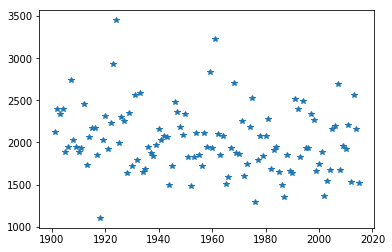

In [2]:
import numpy as np
x=pd.read_csv("C:/Anaconda codes/FLOOD-PREDICTION/kerala.csv")
y=pd.read_csv("C:/Anaconda codes/FLOOD-PREDICTION/kerala.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [4]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      




    SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7   51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6   57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6    3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0   32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3    9.4  105.9  263.3   850.2   520.5  293.6   
5        KERALA  1906  26.7   7.4    9.9   59.4  160.8   414.9   954.2  442.8   
6        KERALA  1907  18.8   4.8   55.7  170.8  101.4   770.9   760.4  981.5   
7        KERALA  1908   8.0  20.8   38.2  102.9  142.6   592.6   902.2  352.9   
8        KERALA  1909  54.1  11.8   61.3   93.8  473.2   704.7   782.3  258.0   
9        KERALA  1910   2.7  25.7   23.3  124.5  148.8   680.0   484.1  473.8   
10       KERALA  1911   3.0   4.3   18.2   51.0  180.6   990.0   705.3  178.6   
11       KERALA  1912   1.9 

In [5]:
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:


#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING

X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


#X1= scale(X)
#print(X1)

Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X,y1))  # PRINTS THE ACCURACY
#ypred=Lr.score(X_test,Y_test)
#print(ypred)






C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


0.860869565217


In [31]:

q1=275 # present years march to may rainfall data on average
w1=130 #average rainfall in past 10 days of june
e1=260 #average inscrease in rainfall from may to june 

q2=200 # present years march to may rainfall data on average
w2=400 #average rainfall in past 10 days of june
e2=300 #average inscrease in rainfall from may to june 


l=[[q1,w1,e1],[q2,w2,e2],[50,300,205]]

#print(X)

#ypred=Lr.predict(X)
f1=Lr.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")
    
        
"""
print("data1 prediction",f1[0],"=")
print("data2 prediction",f1[1])
"""

0 - no chance of severe flood
1 - possibility of  severe flood
1 - possibility of  severe flood


'\nprint("data1 prediction",f1[0],"=")\nprint("data2 prediction",f1[1])\n'